In [ ]:
import pandas as pd

# ---------- LOAD CSV FILES ----------
files = [
    "/content/api_data_aadhar_demographic_0_500000.csv",
    "/content/api_data_aadhar_demographic_500000_1000000.csv",
    "/content/api_data_aadhar_demographic_1500000_2000000.csv",
    "/content/api_data_aadhar_demographic_2000000_2071700.csv"
]

# Read all files and combine
dfs = [pd.read_csv(f) for f in files]
demographic = pd.concat(dfs, ignore_index=True)

# Check total rows and first few rows
print("Total rows in Demographic dataset:", demographic.shape[0])
demographic.head()


Total rows in Demographic dataset: 1571700


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:
demographic = demographic.copy()
demographic.loc[:, 'total_updates'] = (
    demographic['demo_age_5_17'] + demographic['demo_age_17_']
)


Top 10 districts by demographic updates:

              district  total_updates
878              Thane         346443
711               Pune         331345
836  South 24 Parganas         314892
595        Murshidabad         293767
866              Surat         278711
111          Bengaluru         247196
661   North West Delhi         238516
649  North 24 Parganas         220649
923     Uttar Dinajpur         216025
11           Ahmedabad         211996


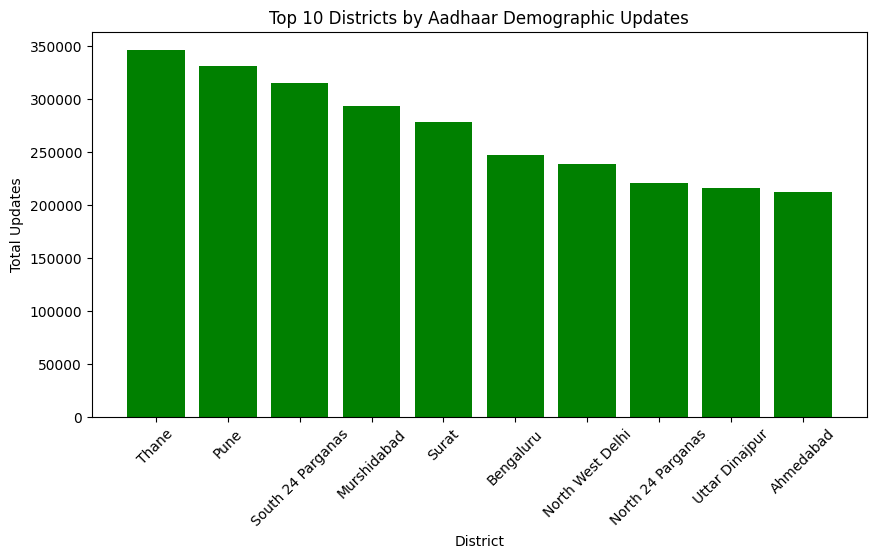

In [ ]:
import matplotlib.pyplot as plt

# ---------- AGGREGATE TOTAL UPDATES PER DISTRICT ----------
demographic['total_updates'] = demographic['demo_age_5_17'] + demographic['demo_age_17_']

district_updates = demographic.groupby('district')['total_updates'].sum().reset_index()

# ---------- TOP 10 DISTRICTS ----------
top_district_updates = district_updates.sort_values('total_updates', ascending=False).head(10)
print("Top 10 districts by demographic updates:\n")
print(top_district_updates)

# ---------- BAR CHART ----------
plt.figure(figsize=(10,5))
plt.bar(top_district_updates['district'], top_district_updates['total_updates'], color='green')
plt.title("Top 10 Districts by Aadhaar Demographic Updates")
plt.xlabel("District")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()